# COMPONENT TWO: Sales Performance of Video Games

__Required Dataset: Video games sales dataset. [Dataset Link](https://www.kaggle.com/datasets/ibriiee/video-games-sales-dataset-2022-updated-extra-feat)__


### The task is to predict the sales performance of several video games worldwide; to classify and cluster the video games based on some categorical variables.
__Attempt the following questions:__
 1. Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why? Provide quantitative justifications for your answers.
 2. What effect will the number of critics and users as well as their review scores have on the sales of Video games in North America, EU and Japan?
 3. What propelled the choice of your regressor for this task? Aptly discuss with quantitative reasons!
 4. Use all the relevant categorical variables in the Video Game Dataset as the target variable at each instance and determine which of the variables performed best in classifying the dataset. Explain your findings.
 5. How did you check whether your models did not overfit?
 6. Can your classification models be deployed in practice based on their performances? Explain.
 7. In the video game dataset, use a relevant categorical variable and other relevant noncategorical variables to form groups at each instance. By employing internal and external evaluation metrics, determine which categorical variable best describes the groups formed. 

In [1]:
# importing libraries that will be utilised 

import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from IPython.display import Image, display
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import os
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
vidGames_df=pd.read_csv("Video_Games.csv")
# reading in the csv_file

In [3]:
vidGames_df.head(3)
# view the first 3 rows of the dataset

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [4]:
vidGames_df.tail(3)
#having a look at the last to rows of the dataset

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.0,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING AND EXPLORATION

In [5]:
vidGames_df.info()
# getting an overview info from my data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# __Column Description Details__
 - Name: The name of the video game.
 - Platform: The platform on which the game was released, such as PlayStation, Xbox, Nintendo, etc.
 - Year of Release: The year in which the game was released.
 - Genre: The genre of the video game, such as action, adventure, sports, etc.
 - Publisher: The company responsible for publishing the game.
 - NA Sales: The sales of the game in North America.
 - EU Sales: The sales of the game in Europe.
 - JP Sale: The sales of the game in Japan.
 - Other Sales: The sales of the game in other regions.
 - Global Sales: The total sales of the game across the world.
 - Critic Score: The average score given to the game by professional critics.
 - Critic Count: The number of critics who reviewed the game.
 - User Score: The average score given to the game by users.
 - User Count: The number of users who reviewed the game.
 - Developer: The company responsible for developing the game.
 - Rating: The rating assigned to the game by organizations such as the ESRB or PEGI.

In [6]:
# checking the null values in each column
vidGames_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
vidGames_df.duplicated().sum()
# checking for duplicates 

0

__There are no duplicates in the dataset.However, there are null values in some of the columns, this will need to be corrected in order for our ML to work effectively.__
- some columns that contains numerical data can be filled using basic statistics of mean, median and mode
- for the columns with categorical data, check will be conducted on each columns before deciding what to do with them

__<u>Checking the number of unique values in every column__

In [8]:
vidGames_df.nunique().to_frame('No. of Unique Values')

,No. of Unique Values
Name,11562
Platform,31
Year_of_Release,39
Genre,12
Publisher,581
NA_Sales,402
EU_Sales,307
JP_Sales,244
Other_Sales,155
Global_Sales,629


__Checking unique values in the name column__

In [9]:
# Names=vidGames_df["Name"].value_counts()
# #getting distinct value in the name column with the number of each occurance 
# for x, (Names, count) in enumerate(Names.iteritems(), start=1):
#     print(f"{x}. {Names}: {count}")
    
# this is more orgarnised but it takes larger space,because of efficiency in performance, the following cell is used to get the same result

In [10]:
name_count=vidGames_df.Name.value_counts()
name_count.head(9)

Need for Speed: Most Wanted                12
FIFA 14                                     9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
FIFA 15                                     8
LEGO Harry Potter: Years 5-7                8
Lego Batman 3: Beyond Gotham                8
LEGO Star Wars II: The Original Trilogy     8
Name: Name, dtype: int64

In [11]:
Null_names=vidGames_df[vidGames_df['Name'].isnull()]
Null_names

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


__there only 2 rows with null values in the Name column,however these same rows contain other null values, hence its hard to make any logical inference in the name column and dropping the column maybe the best solution.However, there are similarities between two rows,they both have the same publisher and year_of_release.The publisher column will be analysed further.__ 

In [12]:
acc_ent=vidGames_df[vidGames_df["Publisher"]=='Acclaim Entertainment']
print(len(acc_ent))
acc_ent.head(5) #i had to set the head to 5 because of system performance

186


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
399,WWF War Zone,PS,1998.0,Fighting,Acclaim Entertainment,2.47,0.76,0.00,0.13,3.36,NaN,NaN,NaN,NaN,NaN,NaN
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,0.22,2.52,80.0,15.0,7.9,46.0,Acclaim Studios Cheltenham,T
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993.0,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93,NaN,NaN,NaN,NaN,NaN,NaN
933,Turok 2: Seeds of Evil,N64,1997.0,Platform,Acclaim Entertainment,1.37,0.41,0.04,0.04,1.86,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
acc_ent.Name.value_counts()

All-Star Baseball 2003                                4
Legends of Wrestling II                               4
All-Star Baseball 2004                                4
Dave Mirra Freestyle BMX 2                            4
Turok: Evolution                                      4
BMX XXX                                               3
Vexx                                                  3
Burnout                                               3
Legends of Wrestling                                  3
ATV Quad Power Racing 2                               3
Burnout 2: Point of Impact                            3
Aggressive Inline                                     3
NBA Jam Tournament Edition                            3
Speed Kings                                           3
NBA Jam                                               3
XGRA: Extreme G Racing Association                    3
Gladiator: Sword of Vengeance                         2
Armorines: Project S.W.A.R.M.                   

In [14]:
acc_ent.Name.nunique()

119

__there are 119 unique video games name published by Acclaim entertainment, which means the two missing names could have been anything .Based on this, the decsion will be to drop the rows.More over dropping to rows will not have a material effect on the analysis.__

In [15]:
#dropping rows with null values in name colume
print ('The length of the dataframe before dropping nans in Name column', len(vidGames_df))
vidGames_df = vidGames_df.dropna(subset=['Name'])
print ('The length of the dataframe after dropping nans in Name column', len(vidGames_df))

The length of the dataframe before dropping nans in Name column 16719
The length of the dataframe after dropping nans in Name column 16717


# YEAR OF RELEASE:Data Cleaning

In [16]:
NA_yr_of_release =vidGames_df[vidGames_df["Year_of_Release"].isnull()]
NA_yr_of_release.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.33,0.00,0.21,2.47,92.0,72.0,8.2,178.0,Harmonix Music Systems,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.51,0.61,0.00,0.21,2.34,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
719,Call of Duty 3,Wii,NaN,Shooter,Activision,1.17,0.84,0.00,0.23,2.24,69.0,42.0,6.7,61.0,Exakt,T
805,Rock Band,Wii,NaN,Misc,MTV Games,1.33,0.56,0.00,0.20,2.08,80.0,21.0,6.3,37.0,Harmonix Music Systems,T


In [17]:
NA_yr_of_release.Name.value_counts()

LEGO Harry Potter: Years 5-7                                          7
Happy Feet Two                                                        4
Rock Band                                                             4
Test Drive Unlimited 2                                                3
Bejeweled 3                                                           3
WRC: FIA World Rally Championship                                     3
Singularity                                                           2
NBA Live 2003                                                         2
Silent Hill: Homecoming                                               2
Rock Revolution                                                       2
Robert Ludlum's The Bourne Conspiracy                                 2
The Chronicles of Narnia: The Lion, The Witch and The Wardrobe        2
Backbreaker                                                           2
The Lord of the Rings: War in the North                         

__we can see from above that some of the names in the column have their year of release attached to it.__
- step one: extract the year from the name and use it as year_of _release

In [18]:
# number of null rows before extraction
print(len(NA_yr_of_release))

269


In [19]:
NA_yr_of_release['Year_of_Release'] = NA_yr_of_release['Name'].str.extract(r'(\d{4})', expand=False)
# this code effectively extract first occurrence of a four-digit number (\d{4}) from each value in the 'Name' column 
# and then assign it to the Year_of_Release column

In [20]:
#the null counts of the Year_of_Release column before extraction
print ('the null counts of the Year_of_Release column before extraction',vidGames_df['Year_of_Release'].isna().sum())

the null counts of the Year_of_Release column before extraction 269


In [21]:
vidGames_df.loc[vidGames_df['Year_of_Release'].isnull(), 'Year_of_Release'] = vidGames_df.loc[vidGames_df['Year_of_Release'].isnull(), 'Name'].str.extract(r'(\d{4})', expand=False)
# the first part of the code before the equal sign sets a condition and the column to output
# after the equal sign the second part of the sets a condition and the column(name) to output,and it extract  first occurrence of a four-digit number (\d{4}) from each value in the 'Name' column 
# and assigned it to the year of release column

In [22]:
print ('the null counts of the Year_of_Release column after extraction',vidGames_df['Year_of_Release'].isna().sum())

the null counts of the Year_of_Release column after extraction 252


__randomly checking names which year_of_release is null, to have clue if all the games where released on all platform the same year.__

In [23]:
vidGames_df[vidGames_df['Name']=='LEGO Batman: The Videogame']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,Warner Bros. Interactive Entertainment,2.04,1.02,0.0,0.32,3.38,76.0,49.0,7.9,75.0,Traveller's Tales,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.0,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.75,1.01,0.0,0.29,3.05,72.0,16.0,8,16.0,TT Fusion,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.39,0.0,0.19,1.29,75.0,24.0,7.7,33.0,Traveller's Tales,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.44,0.0,0.27,1.28,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.03,0.0,0.52,1.27,77.0,8.0,8.9,17.0,Traveller's Tales,E10+
12466,LEGO Batman: The Videogame,PC,2008.0,Action,Warner Bros. Interactive Entertainment,0.02,0.03,0.0,0.01,0.06,80.0,15.0,7.8,61.0,Traveller's Tales,E10+


In [24]:
vidGames_df[vidGames_df['Name']=='Space Invaders']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,Taito,0.00,0.00,0.46,0.00,0.46,NaN,NaN,NaN,NaN,NaN,NaN
8581,Space Invaders,N64,1999.0,Shooter,Activision,0.13,0.03,0.00,0.00,0.16,NaN,NaN,NaN,NaN,NaN,NaN
10384,Space Invaders,GBA,2002.0,Shooter,Activision,0.08,0.03,0.00,0.00,0.11,NaN,NaN,NaN,NaN,NaN,NaN


__Based on the check for the LEGO Batman: The Videogame, it shows that the year is available on other platforms. This can be used as the basis to filling the nans. The same is not applicable to games such as Space Invaders which has different years for the video game with the same name.__

-I will try the first approach of games with the same name and there is year value present from other platforms

In [25]:
game_year_dict = dict(zip(vidGames_df[vidGames_df['Year_of_Release'].notnull()]['Name'], vidGames_df[vidGames_df['Year_of_Release'].notnull()]['Year_of_Release']))
# loop through the rows of the games dataframe
for index, row in vidGames_df.iterrows():
    # checks if row is null for column 'Year_of_Release' and also check if the name is in the dictionary
    if pd.isnull(row['Year_of_Release']) and row['Name'] in game_year_dict:
        # fill the year of release with the value from the game_year_dict
        vidGames_df.loc[index, 'Year_of_Release'] = game_year_dict[row['Name']]

In [26]:
# confirming if it worked
lego_bat = vidGames_df[vidGames_df['Name'] == 'LEGO Batman: The Videogame']
lego_bat 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,Warner Bros. Interactive Entertainment,2.04,1.02,0.0,0.32,3.38,76.0,49.0,7.9,75.0,Traveller's Tales,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.0,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.75,1.01,0.0,0.29,3.05,72.0,16.0,8,16.0,TT Fusion,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.39,0.0,0.19,1.29,75.0,24.0,7.7,33.0,Traveller's Tales,E10+
1538,LEGO Batman: The Videogame,PSP,2008.0,Action,Warner Bros. Interactive Entertainment,0.57,0.44,0.0,0.27,1.28,73.0,5.0,7.4,10.0,Traveller's Tales,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.03,0.0,0.52,1.27,77.0,8.0,8.9,17.0,Traveller's Tales,E10+
12466,LEGO Batman: The Videogame,PC,2008.0,Action,Warner Bros. Interactive Entertainment,0.02,0.03,0.0,0.01,0.06,80.0,15.0,7.8,61.0,Traveller's Tales,E10+


In [27]:
vidGames_df.Year_of_Release.isnull().sum()
# there still 139 null values left

139

__what we can do now is to drop these rows.__

In [28]:
vidGames_df.dropna(subset=['Year_of_Release'], how='all', inplace=True)

In [29]:
vidGames_df.Year_of_Release.isnull().sum()

0

In [30]:
# casting the datatype from float to int
vidGames_df['Year_of_Release'] =vidGames_df['Year_of_Release'].astype(int)

In [31]:
vidGames_df.head(1)
# confirming the data type

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


# PUBLISHER:Data Cleaning

In [32]:
#create a dataframe of null publishers
null_publishers=vidGames_df[vidGames_df['Publisher'].isnull()]
null_publishers.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,NaN,1.57,1.02,0.0,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.0,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2212,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.0,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3148,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
null_publishers["Publisher"].isnull().sum()

39

__Checking some games to see if the missing data is present in other rows.__

In [34]:
vidGames_df[vidGames_df["Name"]=="Sonic the Hedgehog"]
# taking sonic as example, we can see that the publisher for sonic is sega hence we will adopt the approch we used earlier to fill some Nulls 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
257,Sonic the Hedgehog,GEN,1991,Platform,Sega,3.03,0.91,0.26,0.13,4.34,NaN,NaN,NaN,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006,Platform,Sega,0.41,0.06,0.04,0.66,1.16,43.0,17.0,4.1,176.0,Sonic Team,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,Sega,0.44,0.48,0.00,0.11,1.04,46.0,38.0,4.4,455.0,Sega,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,NaN,0.00,0.48,0.00,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+


In [35]:
game_pub_dict = dict(zip(vidGames_df[vidGames_df['Publisher'].notnull()]['Name'], vidGames_df[vidGames_df['Publisher'].notnull()]['Publisher']))
# loop through the rows of the games dataframe
for index, row in vidGames_df.iterrows():
    # checks if row is null for column 'Year_of_Release' and also checl if the name is in the dictionary
    if pd.isnull(row['Publisher']) and row['Name'] in game_pub_dict:
        # fill the year of release with the value from the game_year_dict
        vidGames_df.loc[index, 'Publisher'] = game_pub_dict[row['Name']]
        
        


In [36]:
vidGames_df["Publisher"].isnull().sum()
# only 6 rows were affected leaving us with 33 null values

33

In [37]:
null_pub_2=vidGames_df[vidGames_df["Publisher"].isnull()]

In [38]:
null_pub_2.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,NaN,1.57,1.02,0.0,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.0,0.02,1.21,NaN,NaN,NaN,NaN,NaN,NaN
2212,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.0,0.02,0.93,NaN,NaN,NaN,NaN,NaN,NaN
3148,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN
3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64,NaN,NaN,NaN,NaN,NaN,NaN


__scanning through the rest of the dataset that as null values in publisher, we can see that most of the rows also have null values in the developer section.hence , these rows will be dropped__

In [39]:
#droppping the rows with Null values in the Name column
print ('The length of the dataframe before dropping nulls in Publisher Column', len(vidGames_df))
vidGames_df.dropna(subset=['Publisher'], how='all', inplace=True)
print ('The length of the dataframe after dropping nulls in Publisher column', len(vidGames_df))


The length of the dataframe before dropping nulls in Publisher Column 16578
The length of the dataframe after dropping nulls in Publisher column 16545


In [40]:
vidGames_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         6609
User_Count         9004
Developer          6534
Rating             6675
dtype: int64

## NUMERIC DATA: Data Cleaning (Critic Score, Critic Count, User Score, User Count)

__The logic applied here is that, although there might be exceptional performances for some games, typically games from the same publisher, year, genre will have relatively similar scores. Therefore, to fill these missing data, the following will be carried out:__
 - For the numerical columns with nan values, groupby year, publisher and genre and fillna with the average of the values
 - The idea here is not to broaden the average data across multiple years or publishers and genres so there is no significant effect on the data distribution

# Critic Score

In [41]:
null_critic_score=vidGames_df[vidGames_df["Critic_Score"].isnull()]
null_critic_score.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
vidGames_df["Critic_Score"].isnull().sum()

8467

In [43]:
#checking unique values for Critic Score
np.sort(vidGames_df.Critic_Score.unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

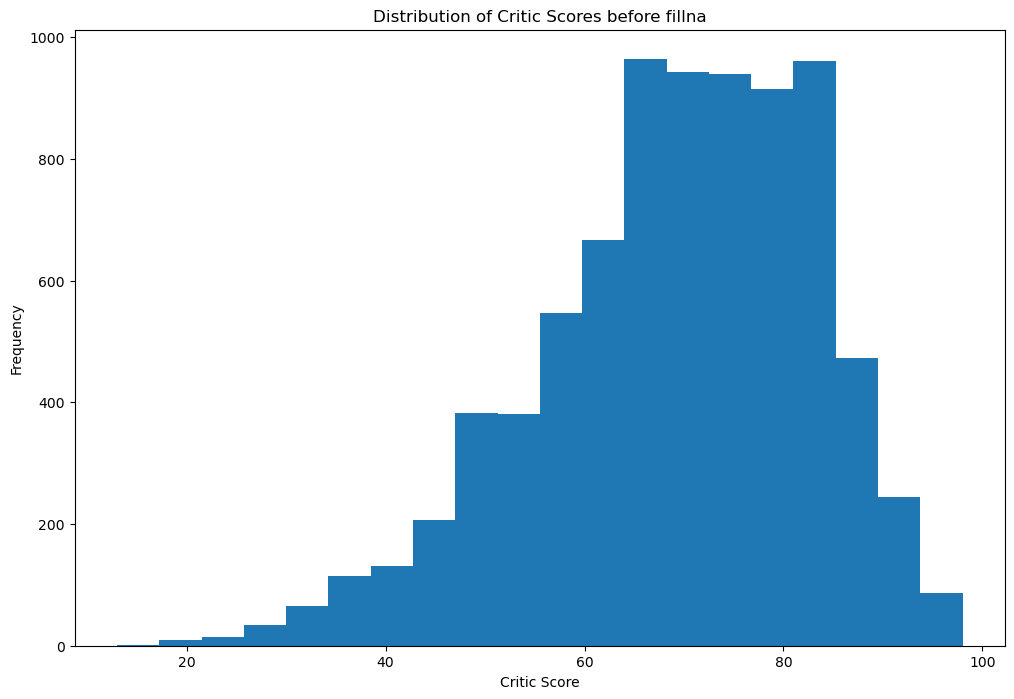

In [44]:
# Filter out rows where critic score is NaN
critic_scores = vidGames_df['Critic_Score'].dropna()

# Create a histogram of critic score values
plt.figure(figsize=(12, 8))
plt.hist(critic_scores, bins=20)

# Set the title and axis labels
plt.title('Distribution of Critic Scores before fillna')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Critic Count

In [45]:
#checking unique values for Critic Count
np.sort(vidGames_df.Critic_Count.unique())

array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,
        47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
        58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,
        80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 113.,  nan])

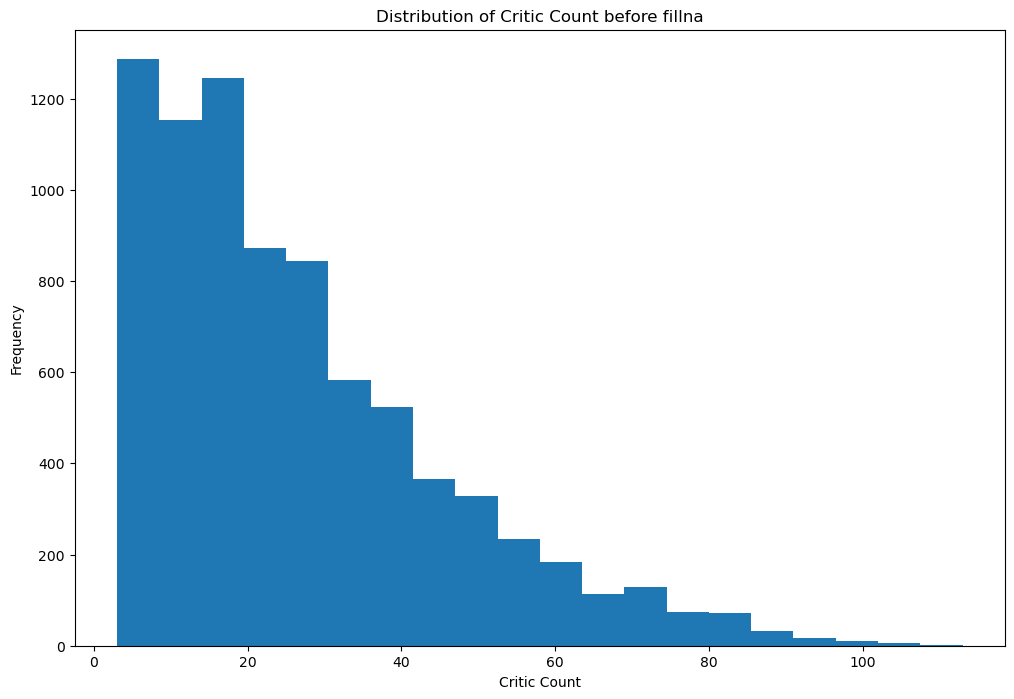

In [46]:
# Filter out rows where critic score is NaN
critic_count = vidGames_df['Critic_Count'].dropna()

# Create a histogram of critic score values
plt.figure(figsize=(12, 8))
plt.hist(critic_count, bins=20)

# Set the title and axis labels
plt.title('Distribution of Critic Count before fillna')
plt.xlabel('Critic Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### User Count

In [47]:
#checking unique values for User Count
np.sort(vidGames_df.User_Count.unique())


array([4.0000e+00, 5.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00,
       9.0000e+00, 1.0000e+01, 1.1000e+01, 1.2000e+01, 1.3000e+01,
       1.4000e+01, 1.5000e+01, 1.6000e+01, 1.7000e+01, 1.8000e+01,
       1.9000e+01, 2.0000e+01, 2.1000e+01, 2.2000e+01, 2.3000e+01,
       2.4000e+01, 2.5000e+01, 2.6000e+01, 2.7000e+01, 2.8000e+01,
       2.9000e+01, 3.0000e+01, 3.1000e+01, 3.2000e+01, 3.3000e+01,
       3.4000e+01, 3.5000e+01, 3.6000e+01, 3.7000e+01, 3.8000e+01,
       3.9000e+01, 4.0000e+01, 4.1000e+01, 4.2000e+01, 4.3000e+01,
       4.4000e+01, 4.5000e+01, 4.6000e+01, 4.7000e+01, 4.8000e+01,
       4.9000e+01, 5.0000e+01, 5.1000e+01, 5.2000e+01, 5.3000e+01,
       5.4000e+01, 5.5000e+01, 5.6000e+01, 5.7000e+01, 5.8000e+01,
       5.9000e+01, 6.0000e+01, 6.1000e+01, 6.2000e+01, 6.3000e+01,
       6.4000e+01, 6.5000e+01, 6.6000e+01, 6.7000e+01, 6.8000e+01,
       6.9000e+01, 7.0000e+01, 7.1000e+01, 7.2000e+01, 7.3000e+01,
       7.4000e+01, 7.5000e+01, 7.6000e+01, 7.7000e+01, 7.8000e

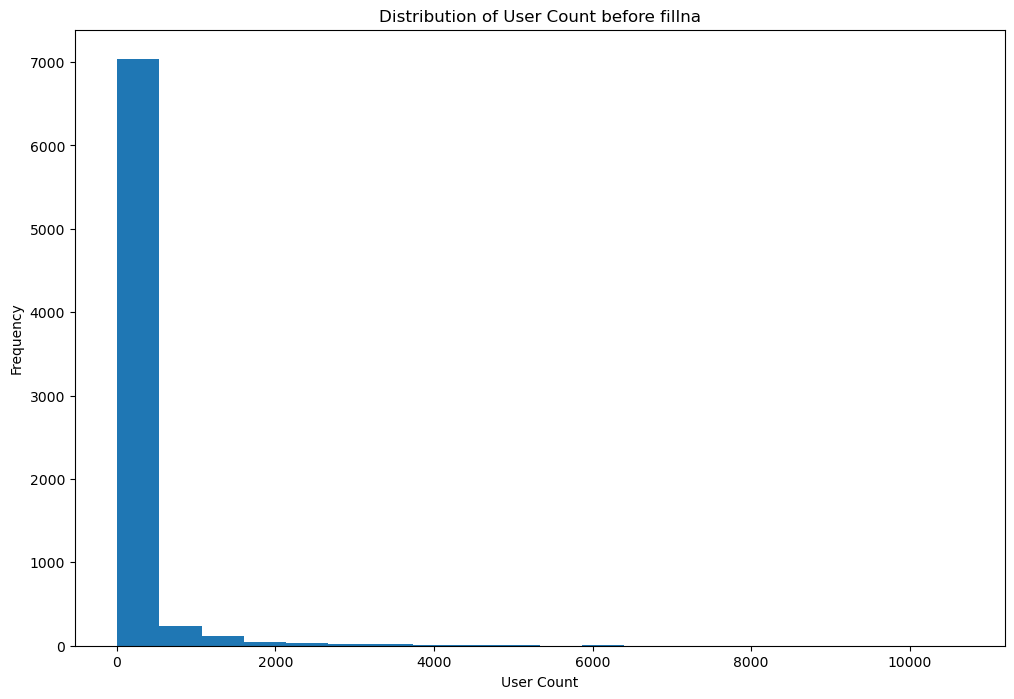

In [48]:
# Filter out rows where critic score is NaN
user_count = vidGames_df['User_Count'].dropna()

# Create a histogram of critic score values
plt.figure(figsize=(12, 8))
plt.hist(user_count, bins=20)

# Set the title and axis labels
plt.title('Distribution of User Count before fillna')
plt.xlabel('User Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### User Score

In [49]:
vidGames_df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [50]:
vidGames_df.User_Score.unique()
# np.sorrt() will not work here because there are text(str) in the columN

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

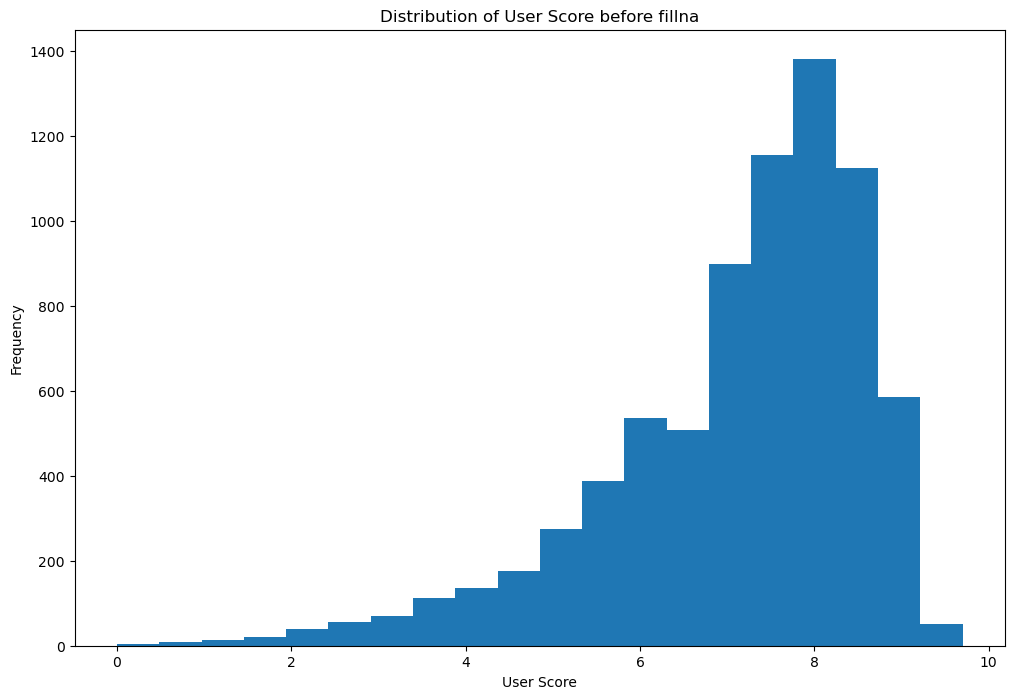

In [51]:
# Filter out rows where critic score is NaN or TBD
user_score = vidGames_df[vidGames_df['User_Score'].notna() & (vidGames_df['User_Score'] != 'tbd')]['User_Score'].astype(float)

# Create a histogram of critic score values
plt.figure(figsize=(12, 8))
plt.hist(user_score, bins=20)

# Set the title and axis labels
plt.title('Distribution of User Score before fillna')
plt.xlabel('User Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

__replace user score where values are tbd with nan__

In [52]:
vidGames_df['User_Score'] = vidGames_df['User_Score'].replace('tbd', np.nan)

In [53]:
vidGames_df['User_Score'] = vidGames_df['User_Score'].astype(float)

__checking correletion of these column__

In [54]:
vidGames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16545 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16545 non-null  object 
 1   Platform         16545 non-null  object 
 2   Year_of_Release  16545 non-null  int32  
 3   Genre            16545 non-null  object 
 4   Publisher        16545 non-null  object 
 5   NA_Sales         16545 non-null  float64
 6   EU_Sales         16545 non-null  float64
 7   JP_Sales         16545 non-null  float64
 8   Other_Sales      16545 non-null  float64
 9   Global_Sales     16545 non-null  float64
 10  Critic_Score     8078 non-null   float64
 11  Critic_Count     8078 non-null   float64
 12  User_Score       7541 non-null   float64
 13  User_Count       7541 non-null   float64
 14  Developer        10011 non-null  object 
 15  Rating           9870 non-null   object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


In [55]:
vidGames_df[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()

,Critic_Score,Critic_Count,User_Score,User_Count
Critic_Score,1.000000,0.424878,0.579627,0.265120
Critic_Count,0.424878,1.000000,0.193497,0.363252
User_Score,0.579627,0.193497,1.000000,0.027162
User_Count,0.265120,0.363252,0.027162,1.000000


__Adding a column to impute binary values and understand which rows have null values before imputation__

In [56]:
#https://datacolumn.iaa.ncsu.edu/blog/2016/02/29/whats-missing-solving-the-missing-values-dilemma/#:~:text=If%20a%20variable%20has%20more,information%20to%20ascertain%20anything%20useful.
#https://datascience.stackexchange.com/questions/67512/what-do-i-do-when-my-column-has-50-data-missing
#https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/2
vidGames_df['has_critic_score'] = np.where(vidGames_df['Critic_Score'].notnull(), 0, 1)
vidGames_df['has_critic_count'] = np.where(vidGames_df['Critic_Count'].notnull(), 0, 1)
vidGames_df['has_user_score'] = np.where(vidGames_df['User_Score'].notnull(), 0, 1)
vidGames_df['has_user_count'] = np.where(vidGames_df['User_Count'].notnull(), 0, 1)

In [57]:
vidGames_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,has_critic_score,has_critic_count,has_user_score,has_user_count
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1


In [58]:
mean_values = vidGames_df.mean()
median_values = vidGames_df.median()

print("Mean Values:")
print(mean_values)
print ('\n')
print("Median Values:")
print(median_values)

Mean Values:
Year_of_Release     2006.494832
NA_Sales               0.264023
EU_Sales               0.145885
JP_Sales               0.078128
Other_Sales            0.047633
Global_Sales           0.535921
Critic_Score          68.991830
Critic_Count          26.367541
User_Score             7.126071
User_Count           162.748442
has_critic_score       0.511756
has_critic_count       0.511756
has_user_score         0.544213
has_user_count         0.544213
dtype: float64


Median Values:
Year_of_Release     2007.00
NA_Sales               0.08
EU_Sales               0.02
JP_Sales               0.00
Other_Sales            0.01
Global_Sales           0.17
Critic_Score          71.00
Critic_Count          21.00
User_Score             7.50
User_Count            24.00
has_critic_score       1.00
has_critic_count       1.00
has_user_score         1.00
has_user_count         1.00
dtype: float64


 __Fill the missing scores based on the average of scores by publisher, year and genre__

### Earlier we saw that Critic_Score and User_score have a relatively strong positive correlation of about 60% (also shown below). Therefore, the approach to fill the nans for this columns will involve taking the average of these 2 columns and using it to fill the nans.
 - Points to note are that user score ranges between 0 and 10
 - Critic score ranges between 0 and 100
 
 What this means is that one of them will either be multiplied or divided by 10.

In [59]:
# Check correlation
vidGames_df[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()

,Critic_Score,Critic_Count,User_Score,User_Count
Critic_Score,1.000000,0.424878,0.579627,0.265120
Critic_Count,0.424878,1.000000,0.193497,0.363252
User_Score,0.579627,0.193497,1.000000,0.027162
User_Count,0.265120,0.363252,0.027162,1.000000


__creating new columns for the average value__

In [60]:
vidGames_df['Average_Score'] = (vidGames_df['User_Score'] + vidGames_df['Critic_Score']/10)/2
vidGames_df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,has_critic_score,has_critic_count,has_user_score,has_user_count,Average_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,0,0,0,0,7.80
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,0,0,0,0,8.25
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,0,0,0,0,8.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,0,0,0,0,8.70
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0,0,0,0,6.20
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,0,0,0,0,8.55
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN


### For the Critic Score, fill with the average of average_scores for the Publisher, genre and year_Step 1


In [61]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8467
Critic_Count        8467
User_Score          9004
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [62]:
# Calculate the average score for each group of games
grouped_scores = vidGames_df.groupby(['Publisher', 'Genre', 'Year_of_Release'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in critic_score with the corresponding group average multiplied by 10
vidGames_df['Critic_Score'] = vidGames_df['Critic_Score'].fillna(grouped_scores * 10)

In [63]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        5080
Critic_Count        8467
User_Score          9004
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [64]:
# Calculate the average score for each group of games
grouped_scores_2 = vidGames_df.groupby(['Genre', 'Year_of_Release'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in critic_score with the corresponding group average multiplied by 10
vidGames_df['Critic_Score'] = vidGames_df['Critic_Score'].fillna(grouped_scores_2 * 10)

In [65]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score         971
Critic_Count        8467
User_Score          9004
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [66]:
# Calculate the average score for each group of games
grouped_scores_3 = vidGames_df.groupby(['Publisher','Year_of_Release'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in critic_score with the corresponding group average multiplied by 10
vidGames_df['Critic_Score'] = vidGames_df['Critic_Score'].fillna(grouped_scores_3 * 10)

In [67]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score         888
Critic_Count        8467
User_Score          9004
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [68]:
# Calculate the average score for each group of games
grouped_scores_4 = vidGames_df.groupby(['Genre'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in critic_score with the corresponding group average multiplied by 10
vidGames_df['Critic_Score'] = vidGames_df['Critic_Score'].fillna(grouped_scores_4 * 10)

In [69]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count        8467
User_Score          9004
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

### The same approach will be taken for User_score

### For the User Score, fill with the average of average_scores for the Publisher, genre and year_Step 1

In [70]:
# Calculate the average score for each group of games
grouped_scores_user = vidGames_df.groupby(['Publisher', 'Genre', 'Year_of_Release'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in user_score with the corresponding group average
vidGames_df['User_Score'] = vidGames_df['User_Score'].fillna(grouped_scores_user)

In [161]:
grouped_scores_user

0        7.583333
1             NaN
2        8.250000
3        7.850000
4             NaN
5             NaN
6        8.016667
7        7.650000
8        8.550000
9             NaN
10       8.525000
11       8.850000
12            NaN
13       7.900000
14       6.200000
15       7.850000
16       8.925000
17       7.750000
18            NaN
19       7.192857
20       7.210000
21            NaN
22            NaN
23       8.925000
24       8.325000
25       9.050000
26       7.775000
27       7.866667
28       8.130000
29       5.833333
30            NaN
31       7.175000
32       6.956250
33            NaN
34       6.662500
35       6.662500
36       7.235714
37       5.833333
38       6.487500
39       9.100000
40       8.350000
41       6.956250
42       8.900000
43       8.525000
44       7.850000
45            NaN
46       7.300000
47       6.950000
48       7.983333
49       8.066667
50            NaN
51       7.844444
52       9.150000
53       8.416667
54       7.916667
55       7

In [71]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count        8467
User_Score          5343
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [72]:
# Calculate the average score for each group of games
grouped_scores_user_2 = vidGames_df.groupby(['Genre', 'Year_of_Release'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in critic_score with the corresponding group average multiplied by 10
vidGames_df['User_Score'] = vidGames_df['User_Score'].fillna(grouped_scores_user_2)

In [73]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count        8467
User_Score           972
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [74]:
# Calculate the average score for each group of games
grouped_scores_user_3 = vidGames_df.groupby(['Publisher', 'Year_of_Release'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in critic_score with the corresponding group average multiplied by 10
vidGames_df['User_Score'] = vidGames_df['User_Score'].fillna(grouped_scores_user_3)

In [75]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count        8467
User_Score           888
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [76]:
# Calculate the average score for each group of games
grouped_scores_user_4 = vidGames_df.groupby(['Genre'])['Average_Score'].transform(lambda x: x.mean())

# Fill the NaN values in critic_score with the corresponding group average multiplied by 10
vidGames_df['User_Score'] = vidGames_df['User_Score'].fillna(grouped_scores_user_4)

In [77]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count        8467
User_Score             0
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [78]:
mean_values = vidGames_df.mean()
median_values = vidGames_df.median()

print("Mean Values:")
print(mean_values)
print ('\n')
print("Median Values:")
print(median_values)

Mean Values:
Year_of_Release     2006.494832
NA_Sales               0.264023
EU_Sales               0.145885
JP_Sales               0.078128
Other_Sales            0.047633
Global_Sales           0.535921
Critic_Score          70.233339
Critic_Count          26.367541
User_Score             7.131039
User_Count           162.748442
has_critic_score       0.511756
has_critic_count       0.511756
has_user_score         0.544213
has_user_count         0.544213
Average_Score          7.104849
dtype: float64


Median Values:
Year_of_Release     2007.00
NA_Sales               0.08
EU_Sales               0.02
JP_Sales               0.00
Other_Sales            0.01
Global_Sales           0.17
Critic_Score          71.00
Critic_Count          21.00
User_Score             7.20
User_Count            24.00
has_critic_score       1.00
has_critic_count       1.00
has_user_score         1.00
has_user_count         1.00
Average_Score          7.35
dtype: float64


__the mean and median value for user_scoe and critic_score is still very well maintained__

In [79]:
# Check correlation
vidGames_df[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()

,Critic_Score,Critic_Count,User_Score,User_Count
Critic_Score,1.000000,0.424878,0.654841,0.261564
Critic_Count,0.424878,1.000000,0.200785,0.363252
User_Score,0.654841,0.200785,1.000000,0.027162
User_Count,0.261564,0.363252,0.027162,1.000000


__There is no clear correlation between scores and count, falling below 0.5 for across the critic and use groups__

### For the user and critic counts, fillna will be done with averages of the count for the year and genre

Filling based on year and genre

In [80]:
vidGames_df['Critic_Count'] = vidGames_df.groupby(['Genre', 'Year_of_Release'])['Critic_Count'].transform(lambda x: x.fillna(x.mean()))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count         936
User_Score             0
User_Count          9004
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [81]:
vidGames_df['User_Count'] = vidGames_df.groupby(['Genre', 'Year_of_Release'])['User_Count'].transform(lambda x: x.fillna(x.mean()))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count         936
User_Score             0
User_Count           953
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [82]:
vidGames_df['Critic_Count'] = vidGames_df.groupby(['Genre'])['Critic_Count'].transform(lambda x: x.fillna(x.mean()))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count           953
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [83]:
vidGames_df['User_Count'] = vidGames_df.groupby(['Genre'])['User_Count'].transform(lambda x: x.fillna(x.mean()))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer           6534
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

# DEVELOPER: Data Cleaning
__The developer should have a relationship with the publisher column as it's been seen with Nintendo__

In [84]:
vidGames_df.head(150)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,has_critic_score,has_critic_count,has_user_score,has_user_count,Average_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E,0,0,0,0,7.80
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.811881,23.006639,7.181188,104.434786,NaN,NaN,1,1,1,1,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E,0,0,0,0,8.25
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E,0,0,0,0,8.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.500000,12.000000,9.050000,850.000000,NaN,NaN,1,1,1,1,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.741667,20.783002,7.174167,34.245240,NaN,NaN,1,1,1,1,NaN
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.500000,431.000000,Nintendo,E,0,0,0,0,8.70
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.600000,129.000000,Nintendo,E,0,0,0,0,6.20
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,8.400000,594.000000,Nintendo,E,0,0,0,0,8.55
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,70.907850,34.852377,7.090785,393.375573,NaN,NaN,1,1,1,1,NaN


In [85]:
unique_developers=vidGames_df.Developer.value_counts()
unique_developers.head(30)

Ubisoft                           203
EA Sports                         171
EA Canada                         167
Konami                            159
Capcom                            139
EA Tiburon                        108
Electronic Arts                   102
Ubisoft Montreal                  101
Visual Concepts                    99
Omega Force                        80
Traveller's Tales                  76
Vicarious Visions                  76
Activision                         75
TT Games                           73
Nintendo                           72
THQ                                71
Namco                              64
Codemasters                        62
Midway                             60
Yuke's                             59
Artificial Mind and Movement       58
High Voltage Software              55
Harmonix Music Systems             52
Maxis                              49
Square Enix                        48
Eurocom Entertainment Software     47
FUN Labs    

In [86]:
len(vidGames_df.Developer.unique())

1683

In [87]:
nintendo_df = vidGames_df[vidGames_df['Publisher'] == 'Nintendo']
nintendo_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,has_critic_score,has_critic_count,has_user_score,has_user_count,Average_Score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E,0,0,0,0,7.80
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.811881,23.006639,7.181188,104.434786,NaN,NaN,1,1,1,1,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E,0,0,0,0,8.25
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E,0,0,0,0,8.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.500000,12.000000,9.050000,850.000000,NaN,NaN,1,1,1,1,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.741667,20.783002,7.174167,34.245240,NaN,NaN,1,1,1,1,NaN
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.500000,431.000000,Nintendo,E,0,0,0,0,8.70
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.600000,129.000000,Nintendo,E,0,0,0,0,6.20
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,8.400000,594.000000,Nintendo,E,0,0,0,0,8.55
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,70.907850,34.852377,7.090785,393.375573,NaN,NaN,1,1,1,1,NaN


In [88]:
nintendo_df.Developer.value_counts()

Nintendo                                                        72
Intelligent Systems                                             18
HAL Labs                                                        13
Camelot Software Planning                                       10
Namco                                                            8
Hudson                                                           7
Level 5                                                          7
Retro Studios                                                    6
TOSE                                                             5
Rare Ltd.                                                        5
Headstrong Games                                                 4
Genius Sonority Inc.                                             4
Indies Zero                                                      4
Arika                                                            4
Nintendo, Nd Cube                                             

In [89]:
len(nintendo_df.Developer.unique())

111

__Testing the effect of the Developer column on Global Sales to see if it is relevant__

In [90]:
from scipy.stats import f_oneway

In [91]:
correlation_test_developer = vidGames_df.groupby('Developer')['Global_Sales']
f_statistic, p_value = f_oneway(*[group[1] for group in correlation_test_developer])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 2.3916033866450084
P-value: 8.296865882485017e-141


__The results above suggests the column should not be dropped. In the meantime, the publisher will be filled as developer__

In [92]:
# fill missing Developer values with Publisher values
vidGames_df["Developer"].fillna(vidGames_df["Publisher"], inplace=True)

In [93]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer              0
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

## RATING: Data Cleaning

In [94]:
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer              0
Rating              6675
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [95]:
# Fill NaNs in Developer and Rating columns
vidGames_df['Rating'] = vidGames_df.groupby(['Genre', 'Year_of_Release', 'Platform'])['Rating'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer              0
Rating              1732
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [96]:
# Fill NaNs in Developer and Rating columns
vidGames_df['Rating'] = vidGames_df.groupby(['Genre', 'Platform'])['Rating'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer              0
Rating              1107
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [97]:
# Fill NaNs in Developer and Rating columns
vidGames_df['Rating'] = vidGames_df.groupby(['Genre', 'Year_of_Release'])['Rating'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer              0
Rating               368
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

In [98]:
# Fill NaNs in Developer and Rating columns
vidGames_df['Rating'] = vidGames_df.groupby(['Genre'])['Rating'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
vidGames_df.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score             0
User_Count             0
Developer              0
Rating                 0
has_critic_score       0
has_critic_count       0
has_user_score         0
has_user_count         0
Average_Score       9574
dtype: int64

#### Aftet the core data cleaning process. The only column with null values is the one that was created to help analyse the score and counts nan values and this column can be dropped

In [99]:
vidGames_df.drop(columns=['Average_Score'], inplace=True)
vidGames_df.isnull().sum()

Name                0
Platform            0
Year_of_Release     0
Genre               0
Publisher           0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score        0
Critic_Count        0
User_Score          0
User_Count          0
Developer           0
Rating              0
has_critic_score    0
has_critic_count    0
has_user_score      0
has_user_count      0
dtype: int64

In [100]:
vidGames_df_copy = vidGames_df.copy()

In [101]:
vidGames_df = vidGames_df.drop(['has_critic_score', 'has_critic_count', 'has_user_score', 'has_user_count'], axis=1)
vidGames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16545 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16545 non-null  object 
 1   Platform         16545 non-null  object 
 2   Year_of_Release  16545 non-null  int32  
 3   Genre            16545 non-null  object 
 4   Publisher        16545 non-null  object 
 5   NA_Sales         16545 non-null  float64
 6   EU_Sales         16545 non-null  float64
 7   JP_Sales         16545 non-null  float64
 8   Other_Sales      16545 non-null  float64
 9   Global_Sales     16545 non-null  float64
 10  Critic_Score     16545 non-null  float64
 11  Critic_Count     16545 non-null  float64
 12  User_Score       16545 non-null  float64
 13  User_Count       16545 non-null  float64
 14  Developer        16545 non-null  object 
 15  Rating           16545 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


## CLEANING HAS BEEN COMPLETED. NEXT IS MODELLING

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [103]:
# Calculate the correlation coefficients
corr_global_sales = vidGames_df.corr()

# Display the correlation coefficients for the 'Global_Sales' column
print(corr_global_sales['Global_Sales'])

Year_of_Release   -0.076521
NA_Sales           0.941079
EU_Sales           0.901281
JP_Sales           0.612695
Other_Sales        0.749188
Global_Sales       1.000000
Critic_Score       0.181093
Critic_Count       0.225290
User_Score         0.086359
User_Count         0.209827
Name: Global_Sales, dtype: float64


__Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why? Provide quantitative justifications for your answers.__

__seperating our targets from features__

In [104]:
# separate predictors and target variable
#https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
#https://medium.com/mlearning-ai/get-column-name-after-fitting-the-machine-learning-pipeline-145a2a8051cc
#https://productds.com/wp-content/uploads/Logistic_Regression.html
X = vidGames_df.drop('Global_Sales', axis=1)
y = vidGames_df['Global_Sales']

In [105]:
X.head(300)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,71.811881,23.006639,7.181188,104.434786,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,90.500000,12.000000,9.050000,850.000000,Nintendo,T
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,71.741667,20.783002,7.174167,34.245240,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,89.000000,65.000000,8.500000,431.000000,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,58.000000,41.000000,6.600000,129.000000,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,87.000000,80.000000,8.400000,594.000000,Nintendo,E
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,70.907850,34.852377,7.090785,393.375573,Nintendo,M


In [106]:
y.head(300)

0      82.53
1      40.24
2      35.52
3      32.77
4      31.37
5      30.26
6      29.80
7      28.92
8      28.32
9      28.31
10     24.67
11     23.21
12     23.10
13     22.70
14     21.81
15     21.79
16     21.04
17     20.81
18     20.61
19     20.15
20     18.25
21     18.14
22     17.28
23     16.27
24     16.15
25     15.85
26     15.29
27     15.14
28     14.98
29     14.73
30     14.64
31     14.63
32     14.61
33     14.60
34     13.79
35     13.67
36     13.47
37     13.32
38     13.10
39     12.84
40     12.66
41     12.63
42     12.61
43     12.13
44     12.12
45     11.89
46     11.77
47     11.68
48     11.66
49     11.35
50     11.18
51     11.01
52     10.95
53     10.81
54     10.70
55     10.60
56     10.55
57     10.50
58     10.49
59     10.30
60     10.25
61     10.12
62      9.90
63      9.87
64      9.86
65      9.72
66      9.71
67      9.49
68      9.44
69      9.36
70      9.31
71      9.30
72      9.18
73      9.16
74      8.91
75      8.79
76      8.76

__defining column transformer and pipeline.__

In [107]:
# define numerical and categorical features
numerical_features = ['Year_of_Release','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
categorical_columns = ['Name','Platform', 'Genre', 'Publisher','Developer', 'Rating']

In [108]:
numerical_features

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count']

In [109]:
categorical_columns

['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

In [110]:
# define preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
# Using handle_unknown='ignore' allows the encoder to gracefully handle unknown categories during transformation 
# without raising an error, it then sets all the value to 0
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [111]:
#defining the preprocessor
# this columnTransformer helps us transform numerical features and categorical features at once 
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_columns)
])

In [112]:
# define regression models
#I have chosen 3 regression models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [113]:
%%time
#to get the information about the time it took to execute.

#joining all the collumns together so that it is used later in this code to print coefficients and feature importance
original_feature_names = np.concatenate((numerical_features, categorical_columns))
#kfolds
kf = KFold(n_splits=3, shuffle=True, random_state=42)
#fitting the models, cross validation and printing the results
#fitting the models, cross validation and printing the results
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Saving the metrics for each fold
    train_rsquared_scores = []
    val_rsquared_scores = []
    train_mse_scores = []
    val_mse_scores = []
    train_rmse_scores = []
    val_rmse_scores = []
    train_mae_scores = []
    val_mae_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        
        pipeline.fit(X_train, y_train)
        
        # Training metrics
        train_pred = pipeline.predict(X_train)
        train_rsquared = r2_score(y_train, train_pred)
        train_mse = mean_squared_error(y_train, train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, train_pred)
        train_rsquared_scores.append(train_rsquared)
        train_mse_scores.append(train_mse)
        train_rmse_scores.append(train_rmse)
        train_mae_scores.append(train_mae)
        
        # Validation metrics
        val_pred = pipeline.predict(X_val)
        val_rsquared = r2_score(y_val, val_pred)
        val_mse = mean_squared_error(y_val, val_pred)
        val_rmse = np.sqrt(val_mse)
        val_mae = mean_absolute_error(y_val, val_pred)
        val_rsquared_scores.append(val_rsquared)
        val_mse_scores.append(val_mse)
        val_rmse_scores.append(val_rmse)
        val_mae_scores.append(val_mae)

        print(f"Model: {type(model).__name__}, Fold: {fold}")
        print(f"Training R-squared: {train_rsquared:.8f}")
        print(f"Validation R-squared: {val_rsquared:.8f}")
        print(f"Training MSE: {train_mse:.9f}")
        print(f"Validation MSE: {val_mse:.9f}")
        print(f"Training RMSE: {train_rmse:.9f}")
        print(f"Validation RMSE: {val_rmse:.9f}")
        print(f"Training MAE: {train_mae:.9f}")
        print(f"Validation MAE: {val_mae:.9f}")
        print('-' * 50)
    
    # Printing average training and validation metric for all folds
    print(f"Model: {type(model).__name__}")
    print(f"Average Training R-squared: {np.mean(train_rsquared_scores):.9f}")
    print(f"Average Validation R-squared: {np.mean(val_rsquared_scores):.9f}")
    print(f"Average Training MSE: {np.mean(train_mse_scores):.9f}")
    print(f"Average Validation MSE: {np.mean(val_mse_scores):.9f}")
    print(f"Average Training RMSE: {np.mean(train_rmse_scores):.9f}")
    print(f"Average Validation RMSE: {np.mean(val_rmse_scores):.9f}")
    print(f"Average Training MAE: {np.mean(val_mae_scores):.9f}")
    print(f"Average Validation MAE: {np.mean(val_mae_scores):.9f}")
    print('-' * 50)
    
    
     #printing feature importance for each of the models
    if isinstance(model, RandomForestRegressor) or isinstance(model, GradientBoostingRegressor):
        feature_importances = pipeline.named_steps["regressor"].feature_importances_
        # named_steps: It is an attribute of the pipeline object that provides access to the individual steps in the pipeline using their names.
        #feature_importances_ used to access the importance or relevance of each feature in a trained model
        feature_importance_dict = {}
        for feature, importance in zip(original_feature_names, feature_importances):
            if feature in feature_importance_dict:
                feature_importance_dict[feature] += importance
            else:
                feature_importance_dict[feature] = importance

        feature_importance = pd.DataFrame.from_dict(feature_importance_dict, orient='index', columns=['importance'])#creates a dataframe named feature_importance using feature_names as index  and a column named "importance" containing the corresponding feature importances.
        feature_importance["colors"] = feature_importance["importance"].apply(lambda x: "green" if x > 0 else "red")
        feature_importance = feature_importance.sort_values("importance", ascending=False)
        print(feature_importance)
# In linear regression, the coefficients represent the relationship between each feature and the target variable. 
# The magnitude of the coefficient indicates the strength of the relationship, while the sign (+/-) indicates
# the direction of the relationship. Larger absolute values of coefficients suggest greater importance.
    else:
        coefs = pipeline.named_steps["regressor"].coef_.flatten()

        coef_dict = {}
        for feature, coef in zip(original_feature_names, coefs):
            if feature in coef_dict:
                coef_dict[feature] += coef
            else:
                coef_dict[feature] = coef

        coef = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['coef'])
        coef["abs_coef"] = coef["coef"].apply(lambda x: abs(x))
        coef["colors"] = coef["coef"].apply(lambda x: "green" if x > 0 else "red")
        coef = coef.sort_values("abs_coef", ascending=False)
        print(coef)
        print('\n')  

Model: LinearRegression, Fold: 0
Training R-squared: 0.99999719
Validation R-squared: 0.99998091
Training MSE: 0.000005934
Validation MSE: 0.000057898
Training RMSE: 0.002436048
Validation RMSE: 0.007609063
Training MAE: 0.001032079
Validation MAE: 0.005404308
--------------------------------------------------
Model: LinearRegression, Fold: 1
Training R-squared: 0.99999792
Validation R-squared: 0.99995739
Training MSE: 0.000005991
Validation MSE: 0.000063677
Training RMSE: 0.002447629
Validation RMSE: 0.007979802
Training MAE: 0.001048705
Validation MAE: 0.005766494
--------------------------------------------------
Model: LinearRegression, Fold: 2
Training R-squared: 0.99999725
Validation R-squared: 0.99997742
Training MSE: 0.000006224
Validation MSE: 0.000061578
Training RMSE: 0.002494813
Validation RMSE: 0.007847140
Training MAE: 0.001063289
Validation MAE: 0.005714557
--------------------------------------------------
Model: LinearRegression
Average Training R-squared: 0.999997453


## 2. What effect will the number of critics and users as well as their review scores have on the sales of Video games in North America, EU and Japan?

In [114]:
vidGames_df_copy = vidGames_df.copy()
vidGames_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16545 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16545 non-null  object 
 1   Platform         16545 non-null  object 
 2   Year_of_Release  16545 non-null  int32  
 3   Genre            16545 non-null  object 
 4   Publisher        16545 non-null  object 
 5   NA_Sales         16545 non-null  float64
 6   EU_Sales         16545 non-null  float64
 7   JP_Sales         16545 non-null  float64
 8   Other_Sales      16545 non-null  float64
 9   Global_Sales     16545 non-null  float64
 10  Critic_Score     16545 non-null  float64
 11  Critic_Count     16545 non-null  float64
 12  User_Score       16545 non-null  float64
 13  User_Count       16545 non-null  float64
 14  Developer        16545 non-null  object 
 15  Rating           16545 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


In [115]:
vidGames_df_copy.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.811881,23.006639,7.181188,104.434786,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.500000,12.000000,9.050000,850.000000,Nintendo,T


In [116]:
selected_cols = vidGames_df_copy[['Critic_Count', 'Critic_Score', 'User_Count', 'User_Score', 'NA_Sales' ]]
corr_cols = selected_cols.corr()
corr_cols

,Critic_Count,Critic_Score,User_Count,User_Score,NA_Sales
Critic_Count,1.000000,0.270434,0.366567,0.103779,0.203785
Critic_Score,0.270434,1.000000,0.223275,0.654841,0.161688
User_Count,0.366567,0.223275,1.000000,0.047097,0.180117
User_Score,0.103779,0.654841,0.047097,1.000000,0.076097
NA_Sales,0.203785,0.161688,0.180117,0.076097,1.000000


In [117]:
selected_cols_eu = vidGames_df_copy[['Critic_Count', 'Critic_Score', 'User_Count', 'User_Score', 'EU_Sales' ]]
corr_cols_eu = selected_cols_eu.corr()
corr_cols_eu

,Critic_Count,Critic_Score,User_Count,User_Score,EU_Sales
Critic_Count,1.000000,0.270434,0.366567,0.103779,0.225650
Critic_Score,0.270434,1.000000,0.223275,0.654841,0.165931
User_Count,0.366567,0.223275,1.000000,0.047097,0.239486
User_Score,0.103779,0.654841,0.047097,1.000000,0.059878
EU_Sales,0.225650,0.165931,0.239486,0.059878,1.000000


In [118]:
selected_cols_jp = vidGames_df_copy[['Critic_Count', 'Critic_Score', 'User_Count', 'User_Score', 'JP_Sales' ]]
corr_cols_jp = selected_cols_jp.corr()
corr_cols_jp

,Critic_Count,Critic_Score,User_Count,User_Score,JP_Sales
Critic_Count,1.000000,0.270434,0.366567,0.103779,0.088319
Critic_Score,0.270434,1.000000,0.223275,0.654841,0.125238
User_Count,0.366567,0.223275,1.000000,0.047097,0.058521
User_Score,0.103779,0.654841,0.047097,1.000000,0.105105
JP_Sales,0.088319,0.125238,0.058521,0.105105,1.000000


In [119]:
# Define a function to calculate sales by region based on genre
def sales_by_region(region):
    return vidGames_df_copy.groupby('Genre')[region].sum()

# Calculate sales by region
na_sales = sales_by_region('NA_Sales')
eu_sales = sales_by_region('EU_Sales')
jp_sales = sales_by_region('JP_Sales')

In [120]:
na_sales

Genre
Action          873.70
Adventure       101.39
Fighting        221.20
Misc            396.13
Platform        444.44
Puzzle          121.69
Racing          357.90
Role-Playing    330.12
Shooter         590.35
Simulation      181.12
Sports          682.16
Strategy         68.06
Name: NA_Sales, dtype: float64

In [121]:
eu_sales 

Genre
Action          517.58
Adventure        63.17
Fighting         99.19
Misc            209.27
Platform        199.87
Puzzle           49.82
Racing          235.50
Role-Playing    188.30
Shooter         316.96
Simulation      113.19
Sports          375.91
Strategy         44.90
Name: EU_Sales, dtype: float64

In [122]:
jp_sales

Genre
Action          160.15
Adventure        52.22
Fighting         87.28
Misc            108.04
Platform        130.71
Puzzle           56.68
Racing           56.68
Role-Playing    353.93
Shooter          38.70
Simulation       63.64
Sports          135.27
Strategy         49.33
Name: JP_Sales, dtype: float64

In [123]:
import statsmodels.api as sm

In [124]:
# Select relevant columns
#https://medium.com/mlearning-ai/multiple-linear-regression-fundamentals-and-modeling-in-python-60db7095deff
X_copy = vidGames_df_copy[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
y_copy = vidGames_df_copy[['NA_Sales', 'EU_Sales', 'JP_Sales']]

# Convert User_Score to float
X_copy['User_Score'] = pd.to_numeric(X_copy['User_Score'], errors='coerce')

# Add constant column for intercept term
X_copy = sm.add_constant(X_copy)

# Fit multiple linear regression model for each region
models = {}
for region in y_copy.columns:
    model = sm.OLS(y_copy[region], X_copy).fit()
    models[region] = model  #storing the fitted model in models using dictionary as the key

# Print regression summary for each region
for region, model in models.items():
    print(region, model.summary(), '\n')

NA_Sales                             OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     281.4
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.85e-234
Time:                        15:20:53   Log-Likelihood:                -19587.
No. Observations:               16545   AIC:                         3.918e+04
Df Residuals:                   16540   BIC:                         3.922e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4243      0.041    -

## 4. Use all the relevant categorical variables in the Video Game Dataset as the target variable at each instance and determine which of the variables performed best in classifying the dataset. Explain your findings.

In [125]:
vidGames_df_copy2 = vidGames_df_copy.copy()
vidGames_df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16545 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16545 non-null  object 
 1   Platform         16545 non-null  object 
 2   Year_of_Release  16545 non-null  int32  
 3   Genre            16545 non-null  object 
 4   Publisher        16545 non-null  object 
 5   NA_Sales         16545 non-null  float64
 6   EU_Sales         16545 non-null  float64
 7   JP_Sales         16545 non-null  float64
 8   Other_Sales      16545 non-null  float64
 9   Global_Sales     16545 non-null  float64
 10  Critic_Score     16545 non-null  float64
 11  Critic_Count     16545 non-null  float64
 12  User_Score       16545 non-null  float64
 13  User_Count       16545 non-null  float64
 14  Developer        16545 non-null  object 
 15  Rating           16545 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


In [126]:
vidGames_df_copy2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.811881,23.006639,7.181188,104.434786,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,90.500000,12.000000,9.050000,850.000000,Nintendo,T


__There are six categorical variables in the dataset and they are:__
1. Name
2. Platform
3. Genre
4. Publisher
5. Developer
6. Rating

In [127]:
"""
-Printing out the length of unique variables in the categorical columns
"""

print ('1. The number of unique values in the Name column: ', vidGames_df_copy2.Name.nunique())
print ('2. The number of unique values in the Platform column: ', vidGames_df_copy2.Platform.nunique())     
print ('3. The number of unique values in the Genre column: ', vidGames_df_copy2.Genre.nunique())     
print ('4. The number of unique values in the Publisher column: ', vidGames_df_copy2.Publisher.nunique())       
print ('5. The number of unique values in the Developer column: ', vidGames_df_copy2.Developer.nunique())   
print ('6. The number of unique values in the Rating column: ', vidGames_df_copy2.Rating.nunique())   

1. The number of unique values in the Name column:  11402
2. The number of unique values in the Platform column:  31
3. The number of unique values in the Genre column:  12
4. The number of unique values in the Publisher column:  579
5. The number of unique values in the Developer column:  1980
6. The number of unique values in the Rating column:  8


__The <u>RELEVANT</u> categorical variables to be used for the analysis will be chosen subjectively based on the number of unique values noted above. The subjective cut-off selected is a maximum of 20 unique values in a column. Therefore, the values selected include:__
1. Genre
2. Rating

In [128]:
# Importing the relevant classifiers and libraries

#classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#importing the evaluation modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#preprocessing, pipelines and transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [129]:
#Plotting the different values in the Genre column
class_dist_genre = vidGames_df_copy2['Genre'].value_counts()

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

In [130]:
class_dist_genre

Action          3342
Sports          2337
Misc            1711
Role-Playing    1486
Shooter         1311
Adventure       1292
Racing          1237
Platform         879
Simulation       858
Fighting         842
Strategy         677
Puzzle           573
Name: Genre, dtype: int64

In [131]:
ditribution_plot(x= class_dist_genre.index, y= class_dist_genre.values, name= 'Class Distribution: Genre')

__preparing dataset for preprocessing.__

In [132]:
# Defining the features and the target for the dataset
features_genre = vidGames_df_copy2.drop('Genre', axis=1)
target_genre = vidGames_df_copy2['Genre']

In [133]:
#Create Training and Validation Set
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(features_genre,
                                                                            target_genre,
                                                                            test_size=0.25,
                                                                            random_state=42)

In [134]:
#Showing the head of the features
features_genre.head()

,Name,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985,Nintendo,29.08,3.58,6.81,0.77,40.24,71.811881,23.006639,7.181188,104.434786,Nintendo,E
2,Mario Kart Wii,Wii,2008,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,11.27,8.89,10.22,1.00,31.37,90.500000,12.000000,9.050000,850.000000,Nintendo,T


In [135]:
#Showing the head of the target
target_genre.head()

0          Sports
1        Platform
2          Racing
3          Sports
4    Role-Playing
Name: Genre, dtype: object

In [136]:
normalise_data = MinMaxScaler()
encode_data = OneHotEncoder(handle_unknown='ignore')

In [137]:
categorial_columns_genre = vidGames_df_copy2.iloc[:, [0,1,4,14,15]].columns.values.tolist()
numerical_columns_genre = vidGames_df_copy2.iloc[:, [2,5,6,7,8,9,10,11,12,13]].columns.values.tolist()

In [138]:
print('Categorical columns:',categorial_columns_genre)
print('\n')
print ('Numerical columns:',numerical_columns_genre)

Categorical columns: ['Name', 'Platform', 'Publisher', 'Developer', 'Rating']


Numerical columns: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']


In [139]:
preprocessor_genre = ColumnTransformer([('min_max scaler', normalise_data, numerical_columns_genre),
                                           ('one_hot_encoder', encode_data, categorial_columns_genre),]
                                          , sparse_threshold=0)

__Models__

In [140]:
"""
-https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
"""
random_forest_genre = Pipeline([
    ('preprocessor_gen', preprocessor_genre),
    ('rf_classifier', RandomForestClassifier(random_state = 42))])

logistic_regression_genre = Pipeline([
    ('preprocessor_gen', preprocessor_genre),                            
    ('lt_classifier', LogisticRegression(random_state=42))])

In [141]:
genre_pipe = [random_forest_genre,
              logistic_regression_genre]

#print steps in the pipeline
for pipe in genre_pipe:
    print (pipe)

Pipeline(steps=[('preprocessor_gen',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('min_max scaler',
                                                  MinMaxScaler(),
                                                  ['Year_of_Release',
                                                   'NA_Sales', 'EU_Sales',
                                                   'JP_Sales', 'Other_Sales',
                                                   'Global_Sales',
                                                   'Critic_Score',
                                                   'Critic_Count', 'User_Score',
                                                   'User_Count']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name', 'Platform',
                                       

In [142]:
%%time
"""
-Fitting the models
"""
for pipe in genre_pipe:
    pipe.fit(X_train_genre,y_train_genre)

CPU times: total: 4min
Wall time: 3min 35s


In [143]:
classifiers_models = {0: 'Random Forest',
                      1: 'Logistic Regression'
                     }

In [144]:
"""
-Classification report
"""

for i, model in enumerate(genre_pipe):
    y_pred_genre = model.predict(X_test_genre)
    print('{} Classification Report for Genre Labels: \n {}\n'.format(classifiers_models[i],
    classification_report(y_test_genre,y_pred_genre)))

Random Forest Classification Report for Genre Labels: 
               precision    recall  f1-score   support

      Action       0.59      0.86      0.70       830
   Adventure       0.86      0.58      0.69       312
    Fighting       0.74      0.69      0.72       193
        Misc       0.75      0.74      0.75       410
    Platform       0.64      0.45      0.53       219
      Puzzle       0.70      0.48      0.57       136
      Racing       0.73      0.58      0.65       325
Role-Playing       0.73      0.70      0.72       405
     Shooter       0.75      0.52      0.61       342
  Simulation       0.78      0.53      0.63       220
      Sports       0.69      0.87      0.77       578
    Strategy       0.73      0.50      0.60       167

    accuracy                           0.69      4137
   macro avg       0.72      0.63      0.66      4137
weighted avg       0.71      0.69      0.68      4137


Logistic Regression Classification Report for Genre Labels: 
               

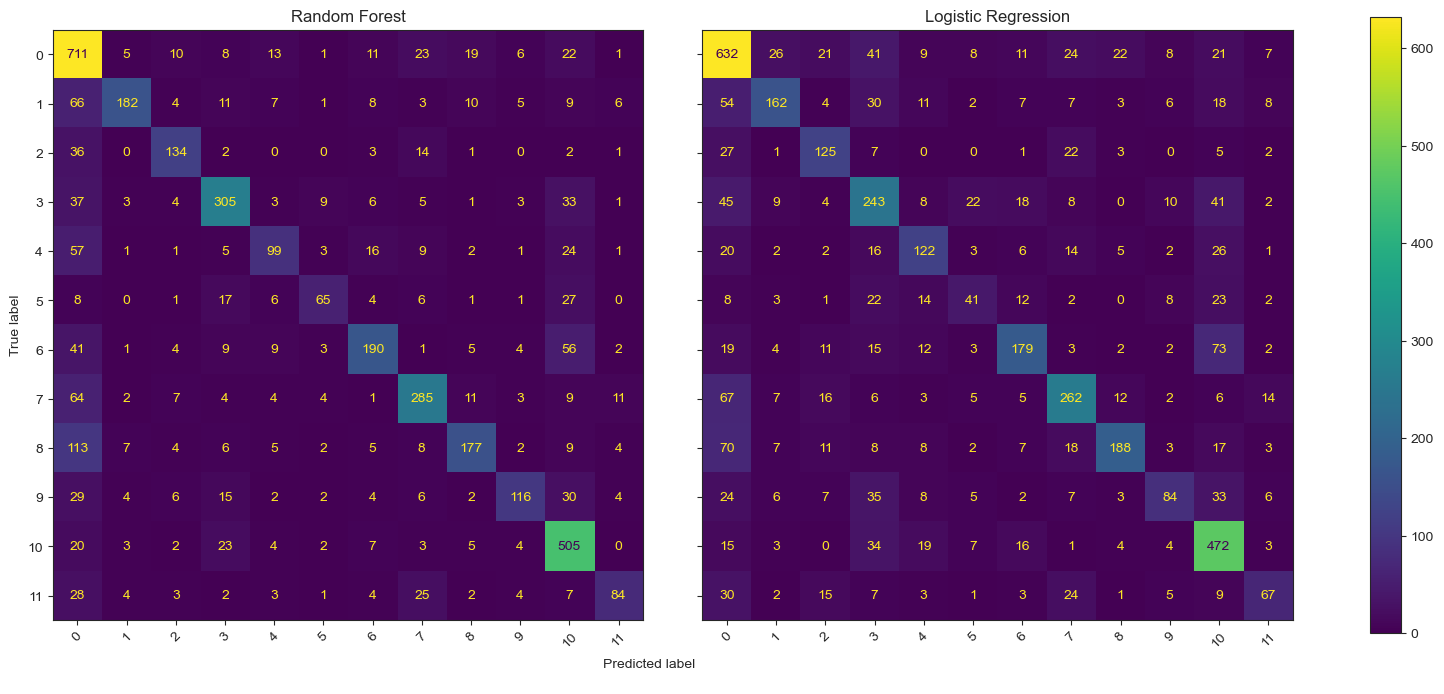

In [145]:
"""
-Confusion Matrix
"""

sns.set_style("ticks")
f, axes = plt.subplots(1, 2, figsize=(20, 8), sharey='row')

for i, model in enumerate (genre_pipe):
    y_pred_genre = model.predict(X_test_genre)
    confusion_matrix_genre = confusion_matrix(y_test_genre, y_pred_genre)
    disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_genre,)
    
    
    disp.plot(ax= axes[i], xticks_rotation=45, )
    #ax.grid(False)
    disp.ax_.set_title(format(classifiers_models[i]))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.05, 'Predicted label\n', ha='left')
plt.subplots_adjust(wspace=0.10, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

In [146]:
from sklearn import metrics

In [147]:
for i, model in enumerate(genre_pipe):
    print('{} Training Accuracy: \n {}\n'.format(classifiers_models[i],
          metrics.accuracy_score(y_train_genre,
                                 model.predict(X_train_genre))*100))

    
    print('{} Test Accuracy: \n {}\n'.format(classifiers_models[i],
      metrics.accuracy_score(y_test_genre,
                             model.predict(X_test_genre))*100))

Random Forest Training Accuracy: 
 100.0

Random Forest Test Accuracy: 
 68.96301667875272

Logistic Regression Training Accuracy: 
 88.12862669245648

Logistic Regression Test Accuracy: 
 62.29151559100797



## 5. In the video game dataset, use a relevant categorical variable and other relevant noncategorical variables to form groups at each instance. By employing internal and external evaluation metrics, determine which categorical variable best describes the groups formed. 

In [148]:
vidGames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16545 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16545 non-null  object 
 1   Platform         16545 non-null  object 
 2   Year_of_Release  16545 non-null  int32  
 3   Genre            16545 non-null  object 
 4   Publisher        16545 non-null  object 
 5   NA_Sales         16545 non-null  float64
 6   EU_Sales         16545 non-null  float64
 7   JP_Sales         16545 non-null  float64
 8   Other_Sales      16545 non-null  float64
 9   Global_Sales     16545 non-null  float64
 10  Critic_Score     16545 non-null  float64
 11  Critic_Count     16545 non-null  float64
 12  User_Score       16545 non-null  float64
 13  User_Count       16545 non-null  float64
 14  Developer        16545 non-null  object 
 15  Rating           16545 non-null  object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


__The relevant categorical columns identified earlier include:__
1. Genre
2. Rating

__The relevant non-categorical variable selectecd are:__
 - NA_Sales
 - EU_Sales
 - JP_Sales
 - Other_Sales
 - Critic_Score
 - User_Score
 - Global_Sales
 
__Groups will be formed with User_Score and Critic_Score__

In [149]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score,  davies_bouldin_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score, v_measure_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Workshop codes have been used in this section


### USER SCORE AND NA SALES

In [150]:
#using the class codes
user_na_sales = vidGames_df[['User_Score', 'NA_Sales']]
user_na_sales.head(2)

,User_Score,NA_Sales
0,8.000000,41.36
1,7.181188,29.08


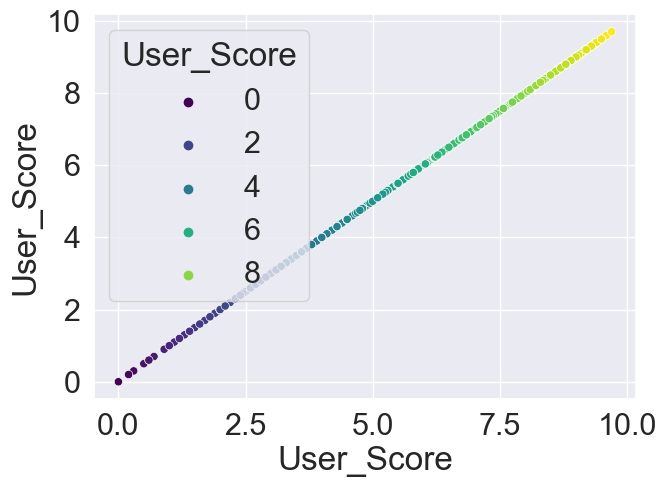

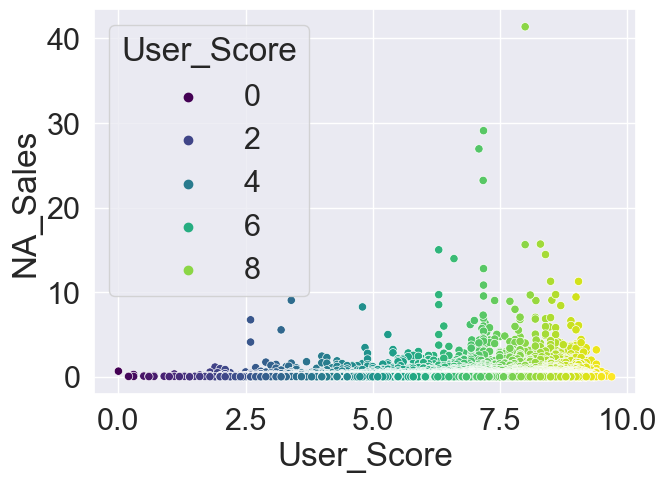

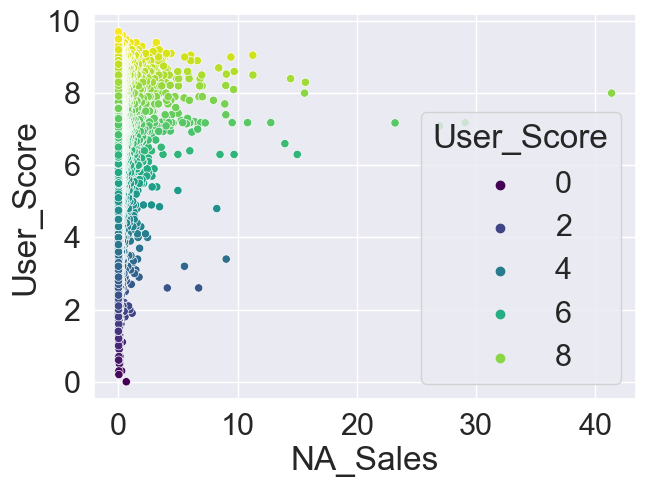

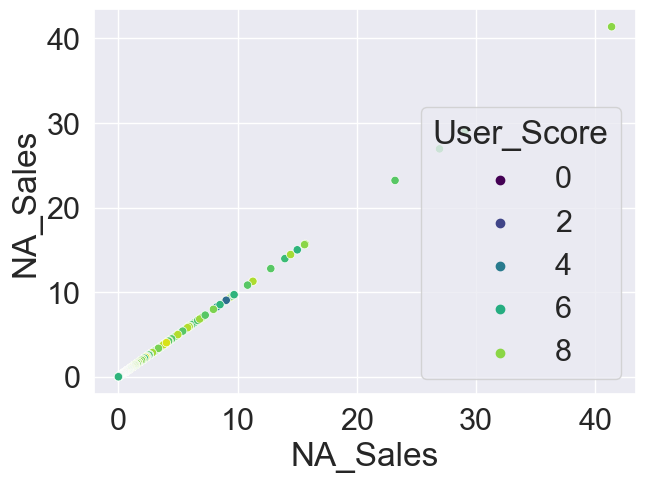

In [151]:
for col1 in user_na_sales.columns:
    for col2 in user_na_sales.columns:
        plt.figure(figsize = (7,5),dpi = 100)
        sns.set(font_scale=2)
        sns.scatterplot(data = user_na_sales, x = user_na_sales[col1],y = user_na_sales[col2],hue='User_Score', palette = 'viridis')
        plt.show()



In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # instantiate an object of the StandardScaler() class



In [153]:
scaled_user_na_sales =scaler.fit_transform(user_na_sales)
scaled_user_na_sales

array([[ 7.13234435e-01,  5.03039416e+01],
       [ 4.11615282e-02,  3.52724848e+01],
       [ 9.59471546e-01,  1.88700808e+01],
       ...,
       [ 3.64398528e-01, -3.23179953e-01],
       [ 1.30788961e-01, -3.10939353e-01],
       [-6.95789033e-01, -3.23179953e-01]])

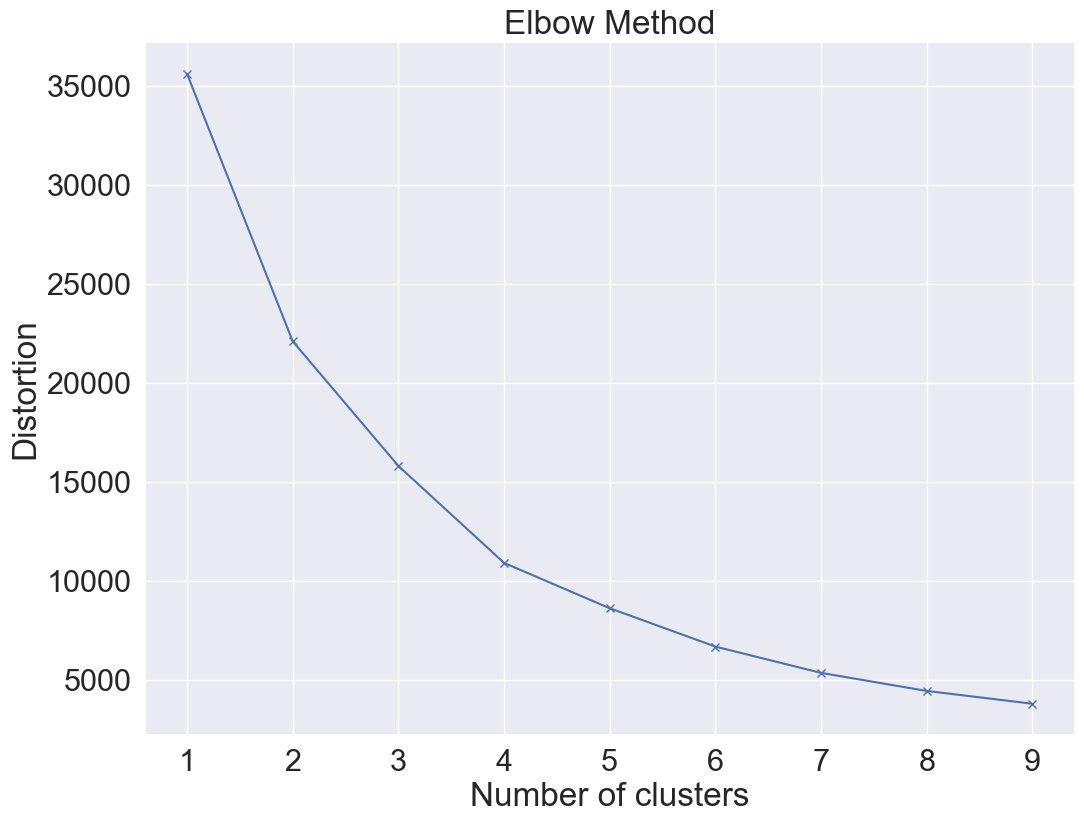

In [154]:
#Determining the suitable number of clusters using Elbow method
distortions= []
K = range(1, 10)
for k in K:
    kmeans =KMeans( n_clusters=k,random_state=42)
    kmeans.fit(user_na_sales)
    distortions.append(kmeans.inertia_)
plt.figure(figsize = (12,9))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()



In [155]:
#Determining the suitable number of clusters using Elbow method
distortions= []
K = range(1, 10)
for k in K:
    kmeans =KMeans( n_clusters=k,random_state=42)
    kmeans.fit(user_na_sales)
    distortions.append(kmeans.inertia_)

In [156]:
for i in distortions:
    print(i)
# looking at the graph we can see that adding more clusters doees not significantly decrease the inertia_ anymore after cluster no.4
# the inertia number is stated below

35600.87052228136
22086.603009399958
15789.663945176084
10891.826220239052
8601.204411556
6664.405759231017
5336.144935805479
4424.0441761737875
3777.35998529853


In [157]:
# Fit the k-means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
C_labels = kmeans.fit_predict(scaled_user_na_sales)
C_labels

array([3, 3, 3, ..., 2, 2, 2])

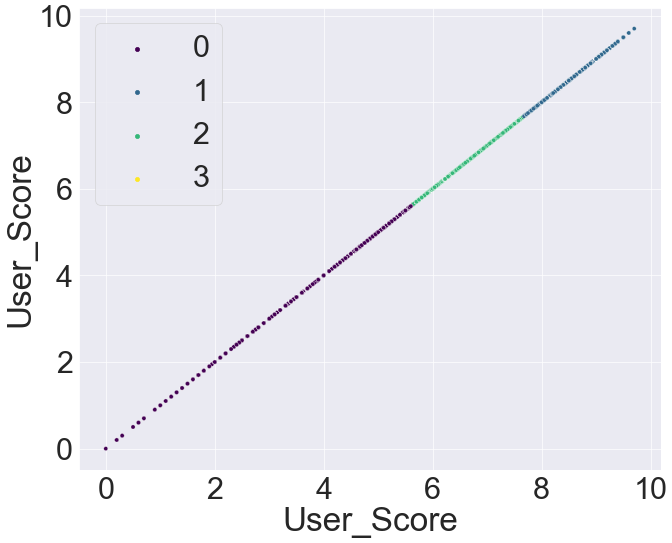

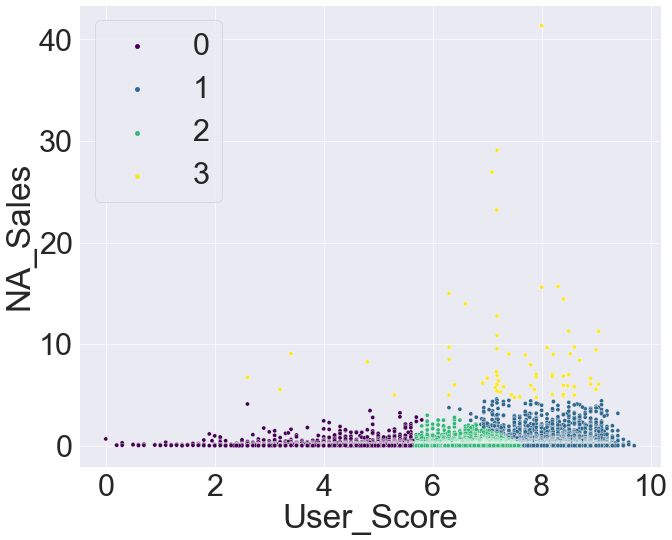

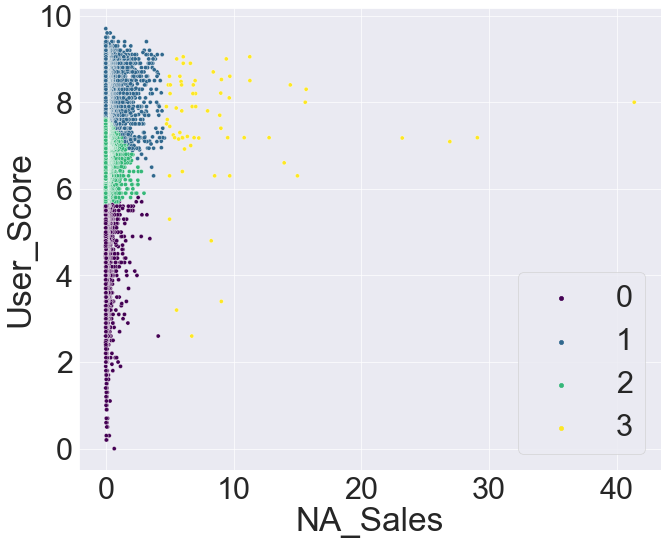

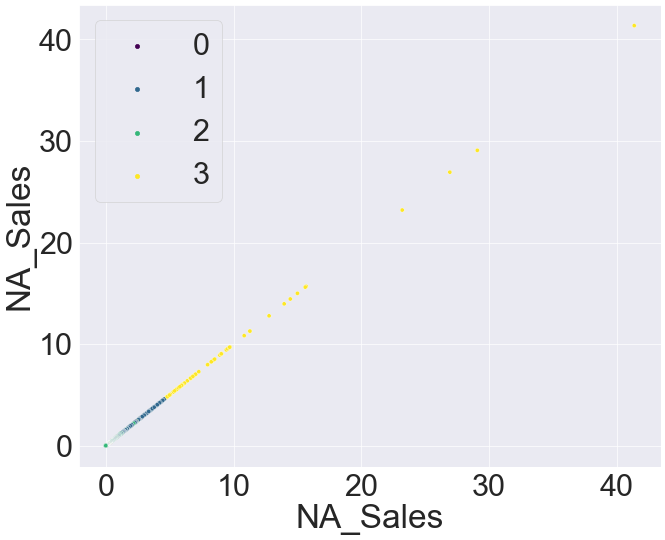

In [158]:
# plotting the attributes to see how they affect the clusters formed 
for col1 in user_na_sales.columns:
    for col2 in user_na_sales.columns:
         plt.figure(figsize = (15,12),dpi = 50)
         sns.set(font_scale=4)
         sns.scatterplot(data = user_na_sales, x = user_na_sales[col1], y = user_na_sales[col2], hue=C_labels, palette = 'viridis')
         plt.show()

In [159]:
# Get the true class labels
y_true_kmeans_genre = vidGames_df['Genre']
y_true_kmeans_rating = vidGames_df['Rating']

### USER SCORE AND NA SALES Internal and External with GENRE and Rating

In [160]:
print(f'External Evaluation Measures')
print(f'********************************')

v_measure = v_measure_score(y_true_kmeans_genre, C_labels)
print(f'V-measure Score with Genre: {v_measure:.3f}')

v_measure = v_measure_score(y_true_kmeans_rating, C_labels)
print(f'V-measure Score with Rating: {v_measure:.3f}')


rand_index = adjusted_rand_score(y_true_kmeans_genre, C_labels)
print(f'Rand Index Score with Genre: {rand_index:.3f}')

rand_index = adjusted_rand_score(y_true_kmeans_rating, C_labels)
print(f'Rand Index Score with Rating: {rand_index:.3f}')


mi_score = adjusted_mutual_info_score(y_true_kmeans_genre, C_labels)
print(f'Mutual Information Score with Genre: {mi_score:.3f}')

mi_score = adjusted_mutual_info_score(y_true_kmeans_rating, C_labels)
print(f'Mutual Information Score with Rating: {mi_score:.3f}\n')

print(f'Internal Evaluation Measures')
print(f'********************************')

# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_user_na_sales, C_labels)
print(f'Davies-Bouldin Index: {db_score:.3f}')


s_score = silhouette_score(scaled_user_na_sales, C_labels)
print(f'Silhouette Coefficient: {s_score:.3f}')

c_score = calinski_harabasz_score(scaled_user_na_sales, C_labels)
print(f'Calinski Harabasz Score: {c_score:.3f}')

External Evaluation Measures
********************************
V-measure Score with Genre: 0.016
V-measure Score with Rating: 0.011
Rand Index Score with Genre: 0.007
Rand Index Score with Rating: 0.011
Mutual Information Score with Genre: 0.015
Mutual Information Score with Rating: 0.010

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.728
Silhouette Coefficient: 0.462
Calinski Harabasz Score: 9590.620
